<a href="https://colab.research.google.com/github/sykathowlader/group6_introToAi/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import requests
from sklearn import preprocessing
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [2]:
url = "https://sykathowlader.github.io/visualization_data/diabetes.csv"

df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

In [3]:
# Display the first few rows of the dataset
df1.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df1.columns # see columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
# Check for missing values in Diabetes_012_health_indicators
df1.isnull().any()

Diabetes_012            False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

There is no missing values in the dataset. Seems this dataset is already cleaned.

In [ ]:
# Get summary statistics of the dataset
df1.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
#(df1 == 1).sum()

In [ ]:
# Get information about the dataset
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

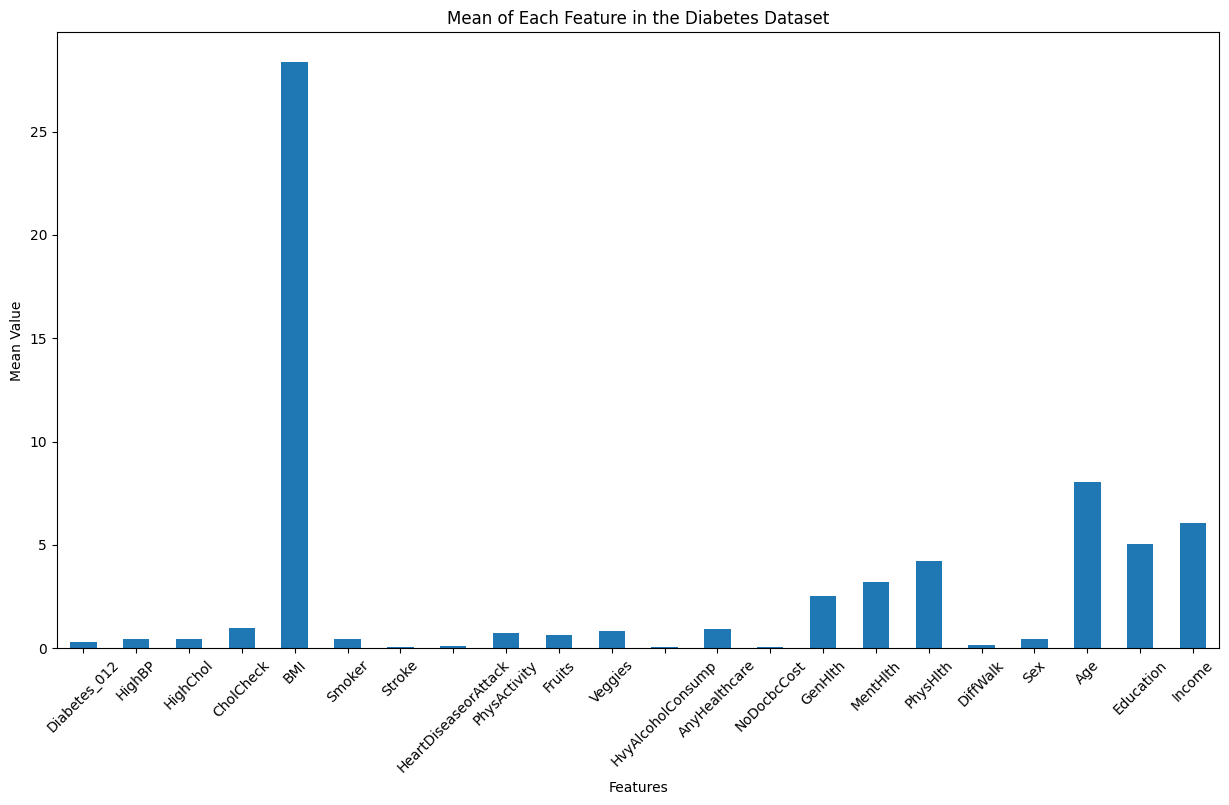

In [ ]:
feature_means = df1.mean()

# Plotting bar chart
plt.figure(figsize=(15, 8))
feature_means.plot(kind='bar')
plt.title('Mean of Each Feature in the Diabetes Dataset')
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Creating bar charts for each feature
for feature in df1.columns:
    fig = px.bar(df1[feature].value_counts().reset_index(), x='index', y=feature,
                 title=f'Distribution of {feature}')
    fig.update_layout(
        xaxis_title=feature,
        yaxis_title='Count',
        xaxis=dict(
            tickmode='array',
            tickvals=[df1[feature].min(), df1[feature].max()]
        ),
        width=500,
        height=300

    )
    fig.show()

In [ ]:
# Creating a new DataFrame to display the max and min values
feature_max = df1.max()
feature_min = df1.min()

feature_max_min_df = pd.DataFrame({
    'Feature': feature_max.index,
    'Max Value': feature_max.values,
    'Min Value': feature_min.values
})

# Displaying the DataFrame
feature_max_min_df

I want to scale my data so that it has a normal distribution with a mean of 0 and a standard deviation of 1. This means that all features are distributed across the same distribution, hence the learning algorithm isn't biased by the magnitude of values.

In [ ]:
# Splitting the dataset into training and testing sets
y = df1['Diabetes_012']
X = df1.drop('Diabetes_012', axis=1)
print (X.shape)
print (y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df1.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Initialize the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training data
print(X_train_scaled[:2])

(253680, 21)
(253680,)
(253680, 22)
(202944, 21)
(50736, 21)
(202944,)
(50736,)
[[-0.86538956  1.16634595  0.19670545 -1.26609183  1.12161459 -0.20565477
  -0.3225563   0.56644773  0.75912866  0.48154168 -0.24397107  0.22692747
  -0.30303553 -0.47913599 -0.4299017  -0.48719672 -0.44984481  1.12717535
   1.29940106  0.96217369  0.93970698]
 [-0.86538956 -0.85737855  0.19670545  0.85115244 -0.89157185 -0.20565477
  -0.3225563   0.56644773 -1.31729976  0.48154168 -0.24397107  0.22692747
  -0.30303553  0.45698576 -0.4299017  -0.48719672 -0.44984481  1.12717535
  -0.01075203 -0.05130201  0.93970698]]


I want to build two decision trees. The second one is modelled with K-fold Cross Validation. First let's define a costomizable function to plot the confusion matrix

In [ ]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar(fraction=0.05)
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 0.7694339325134028


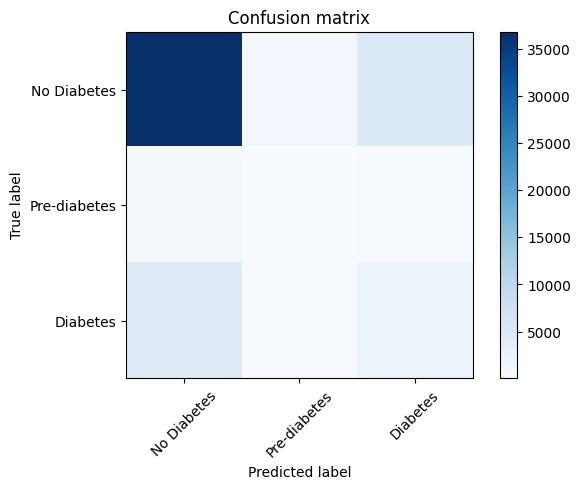

In [ ]:
# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='entropy')

# Train the and test te model
decision_tree.fit(X_train_scaled, y_train)
y_pred = decision_tree.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
diabetes_classes = ['No Diabetes', 'Pre-diabetes', 'Diabetes']
plot_confusion_matrix(cm, diabetes_classes)
plt.show()

Fold #1, Accuracy: 0.7690260908127818


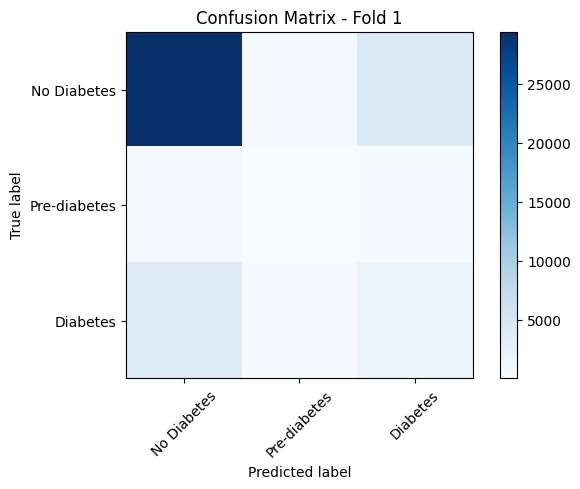

Fold #2, Accuracy: 0.7717115474635985


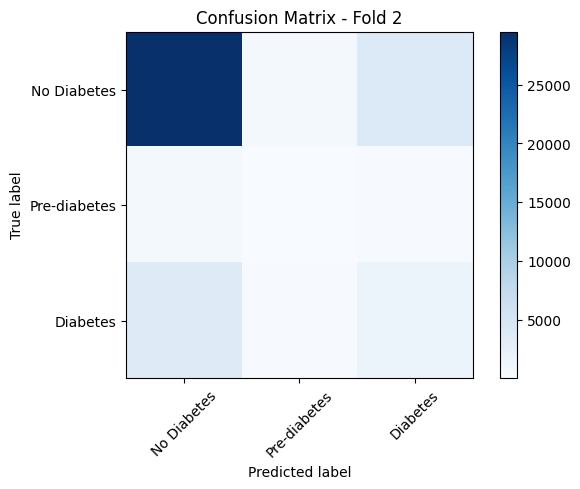

Fold #3, Accuracy: 0.7704057749636601


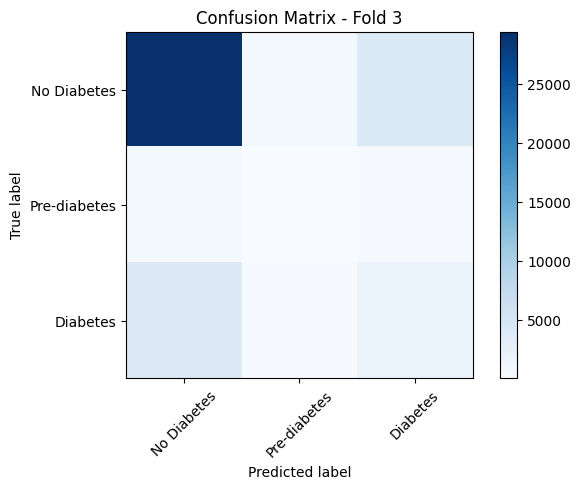

Fold #4, Accuracy: 0.7684840720392224


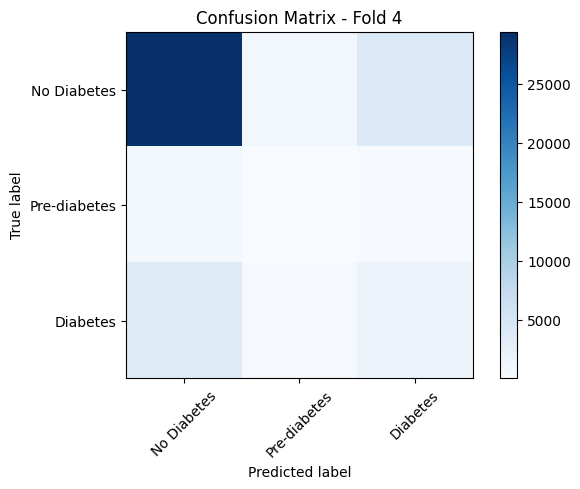

Fold #5, Accuracy: 0.7736769488518774


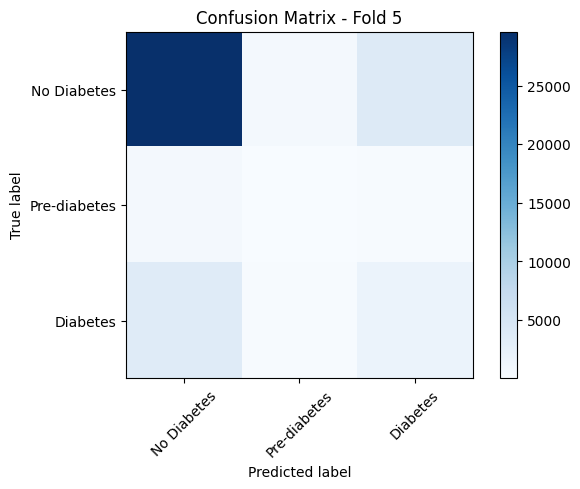

In [ ]:
# 2nd Decision tree with K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
decision_tree = DecisionTreeClassifier(criterion='entropy')

fold = 1
for train_index, test_index in kf.split(X_train_scaled):
    X_train_kf, X_test_kf = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the model
    decision_tree.fit(X_train_kf, y_train_kf)

    # Predict on the validation set
    y_pred_kf = decision_tree.predict(X_test_kf)

    # Accuracy
    accuracy_kf = accuracy_score(y_test_kf, y_pred_kf)
    print(f"Fold #{fold}, Accuracy: {accuracy_kf}")

    # Confusion Matrix
    cm_kf = confusion_matrix(y_test_kf, y_pred_kf)

    # Plotting the Confusion Matrix
    plot_confusion_matrix(cm_kf, ['No Diabetes', 'Pre-diabetes', 'Diabetes'], title=f'Confusion Matrix - Fold {fold}')
    plt.show()

    fold += 1

I noticed that the in the diabetes_012 column the majority of the cases refer to 0 which indicates no diabetes whereas the other category of pre-diabetes and diabetes are a monority. In order to build a sofisticated model that can predict with a good accuracy, whether a person is dabetic or not, it is essential to have a balanced class distribution. Therefore, I am now implementing upsampling for the minority classes to achieve a more representative dataset for model training

0.0    170908
1.0    170908
2.0    170908
Name: Diabetes_012, dtype: int64
(512724, 21)
(50736, 21)
(512724,)
(50736,)
Accuracy: 0.7640137180700095


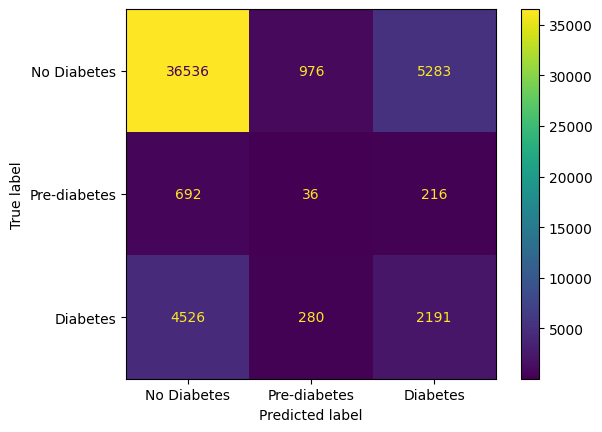

In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)
df_majority = df_train[df_train.Diabetes_012 == 0]
df_minority_1 = df_train[df_train.Diabetes_012 == 1]
df_minority_2 = df_train[df_train.Diabetes_012 == 2]


# Upsample minority classes in the training set
df_minority_1_upsampled = resample(df_minority_1, replace=True, n_samples=len(df_majority), random_state=123)
df_minority_2_upsampled = resample(df_minority_2, replace=True, n_samples=len(df_majority), random_state=123)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_1_upsampled, df_minority_2_upsampled])

print(df_upsampled.Diabetes_012.value_counts())

# Prepare the upsampled training data
X_train_upsampled = df_upsampled.drop('Diabetes_012', axis=1)
y_train_upsampled = df_upsampled['Diabetes_012']

print(X_train_upsampled.shape)
print(X_test.shape)
print(y_train_upsampled.shape)
print(y_test.shape)

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train_upsampled, y_train_upsampled)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Pre-diabetes', 'Diabetes'])
disp.plot()
plt.show()



This Decision Tree Model does not have a good accuracy and makes more mistakes while predicting pre-diabetes and diabetes. Therefore this model is not suitable for our task. Let's build other models to see how they perform. I want to implement the Support Vector Machine now.


In [ ]:
# Splitting the dataset into training and testing sets
y = df1['Diabetes_012']
X = df1.drop('Diabetes_012', axis=1)
print (X.shape)
print (y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(df1.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Initialize the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training data
print(X_train_scaled[:2])




(253680, 21)
(253680,)
(253680, 22)
(202944, 21)
(50736, 21)
(202944,)
(50736,)
[[-0.86538956  1.16634595  0.19670545 -1.26609183  1.12161459 -0.20565477
  -0.3225563   0.56644773  0.75912866  0.48154168 -0.24397107  0.22692747
  -0.30303553 -0.47913599 -0.4299017  -0.48719672 -0.44984481  1.12717535
   1.29940106  0.96217369  0.93970698]
 [-0.86538956 -0.85737855  0.19670545  0.85115244 -0.89157185 -0.20565477
  -0.3225563   0.56644773 -1.31729976  0.48154168 -0.24397107  0.22692747
  -0.30303553  0.45698576 -0.4299017  -0.48719672 -0.44984481  1.12717535
  -0.01075203 -0.05130201  0.93970698]]


In [ ]:
# Train the SVM model
svm_model = SVC(kernel='linear').fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalizing the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(cm))
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plotting the normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
plt.show()

Now, I want to make a neural network model.

In [31]:
y = df1['Diabetes_012']
X = df1.drop('Diabetes_012', axis=1)
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_encoded = pd.get_dummies(df1['Diabetes_012'])
print(y_encoded)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


        0.0  1.0  2.0
0         1    0    0
1         1    0    0
2         1    0    0
3         1    0    0
4         1    0    0
...     ...  ...  ...
253675    1    0    0
253676    0    0    1
253677    1    0    0
253678    1    0    0
253679    0    0    1

[253680 rows x 3 columns]


In [32]:


# Define the neural network architecture
model = Sequential()
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Number of neurons equals number of target classes

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=10, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy}')

Epoch 1/5
16236/16236 [==============================] - 48s 3ms/step - loss: 0.4022 - accuracy: 0.8466 - val_loss: 0.4037 - val_accuracy: 0.8467
Epoch 2/5
16236/16236 [==============================] - 51s 3ms/step - loss: 0.3973 - accuracy: 0.8485 - val_loss: 0.3955 - val_accuracy: 0.8499
Epoch 3/5
16236/16236 [==============================] - 43s 3ms/step - loss: 0.3962 - accuracy: 0.8486 - val_loss: 0.3993 - val_accuracy: 0.8492
Epoch 4/5
16236/16236 [==============================] - 42s 3ms/step - loss: 0.3952 - accuracy: 0.8490 - val_loss: 0.3960 - val_accuracy: 0.8488
Epoch 5/5
1586/1586 [==============================] - 3s 2ms/step - loss: 0.3910 - accuracy: 0.8506
Test accuracy: 0.8505991697311401
